## ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Одновыборочный t-критерий (t-test) используют, чтобы сравнить среднее значение признака с его заданным значением.

Компания закупает батареи для своих устройств у определённого производителя. Раньше батареи работали 40 часов. Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают больше 40 часов. Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Уровень значимости необходимо взять равным 0.05.

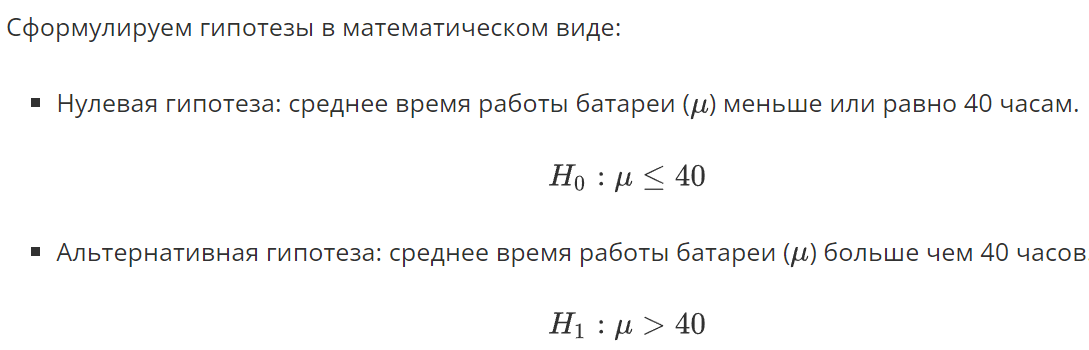

In [6]:
import numpy as np
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = np.array([41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34])

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))
H0 = f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'
Ha = f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.'

# интерпретируем результат
if p <= alpha:
    print(Ha)
else:
    print(H0)

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что время работы батарей стало больше, чем 40 часов.

In [15]:
print('Mean:', data.mean())
print('Median:', np.median(data))

Mean: 41.1
Median: 41.0


При этом среднее 41.1, но это статистически недостоверно

## ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Двухвыборочный t-критерий (t-test) используют, чтобы сравнить средние значения в двух независимых группах.

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

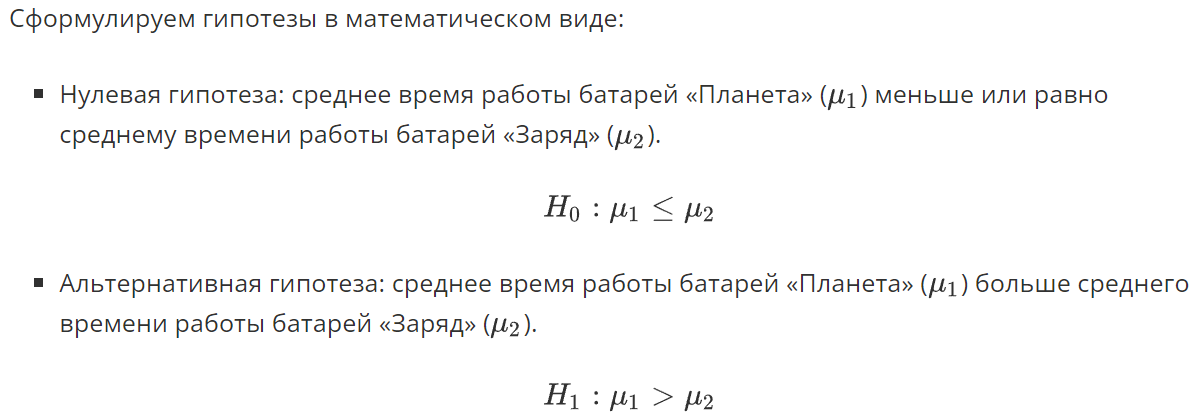

In [13]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.')

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

Случайным образом выбрали по 20 батарей «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.

Батареи «Планета»: 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.

Батареи «Энергия»: 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.

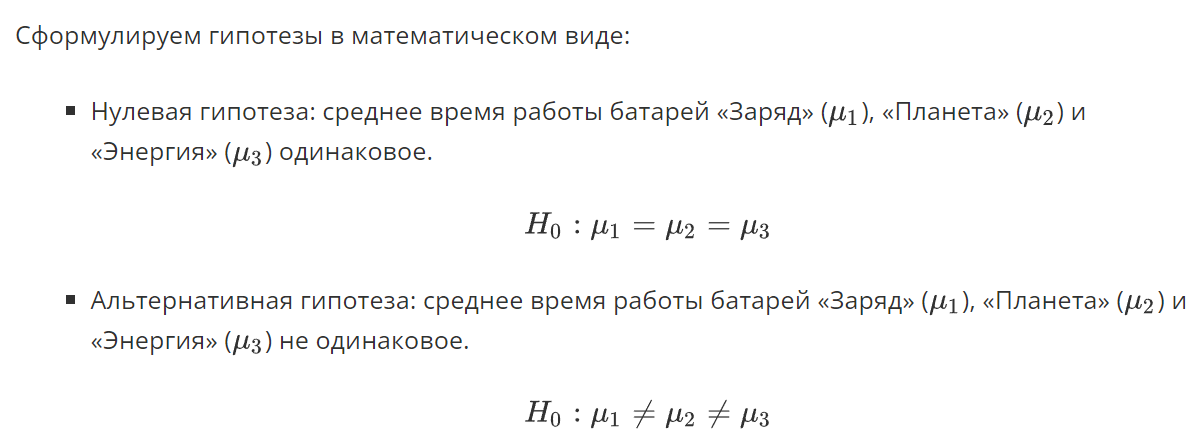

In [14]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.')

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## ПАРНЫЙ T-КРИТЕРИЙ

Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах.

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 20 батарей «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

Батареи «Заряд»: 1, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.

Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.

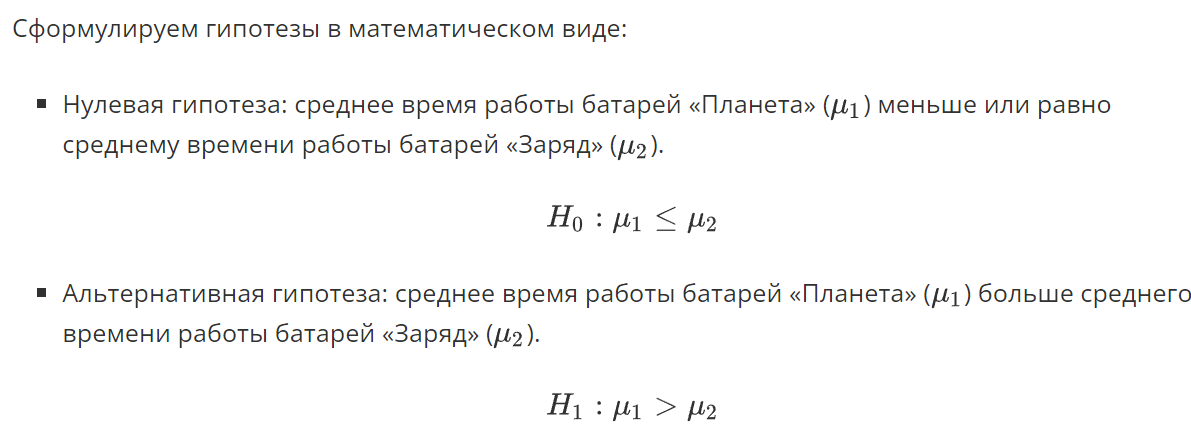

In [17]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На каждом из устройств замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:

Батареи «Заряд»: 36, 45, 41, 41, 35.

Батареи «Планета»: 32, 34, 42, 48, 43.

Батареи «Энергия»: 41, 39, 35, 34, 52.

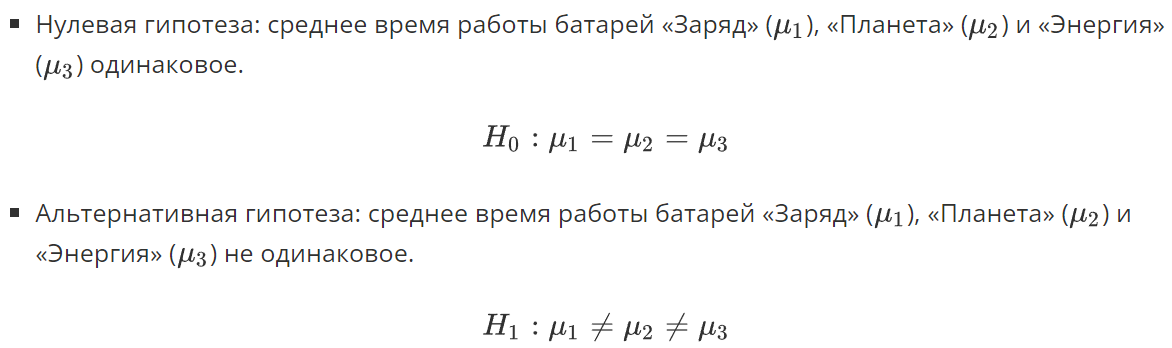

In [18]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



### Задание 7.3

Компания оптимизировала доставку товаров и хочет узнать, стало ли среднее время доставки меньше 40 минут. Измерили время 20 случайных доставок — оно приведено в минутах и содержится в списке data:

data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

Данные распределены нормально.

1 группа с нормальным распределением, следовательно использую - Одновыборочный t-критерий

In [20]:
data = np.array([31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34])
time_value = 40

H0 = 'Среднее время доставки больше, либо равно 40 мин'
Ha = 'Среднее время доставки меньше 40 мин'

# задаём уровень значимости
alpha = 0.05 

# проводим тест
_, p = stats.ttest_1samp(data, popmean=time_value, alternative='less')

print(f'p-value = {p:.3f}')
H0 = f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу. {H0}'
Ha = f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу. {Ha}'

# интерпретируем результат
if p <= alpha:
    print(Ha)
else:
    print(H0)

p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу. Среднее время доставки меньше 40 мин


### Задание 7.4

Компания хочет узнать, отличается ли время доставки в трёх районах города: Северном, Южном, Восточном. Измерили время 25 случайных доставок в каждом из районов — оно составило в минутах:

Северный:

data_north = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

Южный:

data_south = [32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27]

Восточный:

data_east = [80, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81]

Данные распределены нормально.

Три независимые выборки - Однофакторный дисперсионный анализ ANOVA

In [21]:
data_north = np.array([31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34])
data_south = np.array([32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27])
data_east = np.array([80, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81])

H0 = 'Среднее время доставки не зависит от района'
Ha = 'Среднее время доставки отличается в зависимости от района'

# задаём уровень значимости
alpha = 0.05

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(data_north, data_south, data_east)

print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу. {Ha}')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу. {H0}')

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу. Среднее время доставки отличается в зависимости от района


## Задание 7.5

Компания провела обучение курьеров и хочет узнать, привело ли это к уменьшению времени доставки. Для 30 курьеров было измерено время доставки до и после обучения и получены следующие данные в минутах:

до:

data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]

после:

data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

Две зависимые группы - Парный t-критерий

In [28]:
data_before = np.array([21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42])
data_after = np.array([23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16])

H0 = 'Среднее время доставки выросло, либо осталость таким же'
Ha = 'Среднее время доставки снизилось'

# задаём уровень значимости
alpha = 0.05

# проводим тест
# Нужно начинать с альтернативной выборки!
_, p = stats.ttest_rel(data_after, data_before, alternative='less')
print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу. {Ha}')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу. {H0}')

p-value = 0.213
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу. Среднее время доставки выросло, либо осталость таким же
